# 終点誤差分散最小モデル
HarrisおよびWolpertは制御信号の大きさに従い，ノイズが生じるモデルを提案した．さらにこのモデルにおいて，状態の分散が可能な限り小さくなるような制御信号を求めた．これを**終点誤差分散最小モデル** (minimum-variance model; {cite:p}`Harris1998-gj`)と呼ぶ．


終点誤差分散最小モデルは状態$\mathbf{x}_t\in \mathbb{R}^n$, 制御信号$\mathbf{u}_t \in \mathbb{R}^p$とし，$\mathbf{A}\in \mathbb{R}^{n\times n}$, $\mathbf{B}\in \mathbb{R}^{n \times p}$とすると，

$$
\begin{equation}
\mathbf{x}_{t+1} = \mathbf{A} \mathbf{x}_t + \mathbf{B}\mathbf{u}_t (1+\xi_t)
\end{equation}
$$

と表せる．ただし，$\xi_t \sim \mathcal{N}(0, k)\ (k>0)$ である．このため，$\mathbf{u}_t (1+\xi_t)$ の平均は $\mathbf{u}_t$, 分散共分散行列は $k\mathbf{u}_t \mathbf{u}_t^\top$ となる．
$\mathbf{x}_t$ を $x_{t'}\ (t'=0, \ldots, t-1)$ で表すと，

$$
\begin{align}
\mathbf{x}_{t} &= \mathbf{A} \mathbf{x}_{t-1} + \mathbf{B}\mathbf{u}_{t-1} (1+\xi_{t-1})\\
&=\mathbf{A}^2 \mathbf{x}_{t-2} + \mathbf{A}\mathbf{B}\mathbf{u}_{t-2} (1+\xi_{t-2})) + \mathbf{B}\mathbf{u}_{t-1} (1+\xi_{t-1})\\
&=\cdots\\
&=\mathbf{A}^t \mathbf{x}_{0} + \sum_{t'=0}^{t-1} \mathbf{A}^{t-t'-1}\mathbf{B}\mathbf{u}_{t'} (1+\xi_{t'})\\
\end{align}
$$

となるので，$\mathbf{x}_t$ の平均と分散共分散行列はそれぞれ，

$$
\begin{align}
\mathbb{E}\left[\mathbf{x}_{t}\right]&=\mathbf{A}^{t} \mathbf{x}_{0}+\sum_{t'=0}^{t-1} \mathbf{A}^{t-t'-1} \mathbf{B} \mathbf{u}_{t'}\\
\operatorname{Cov}\left[\mathbf{x}_{t}\right]&=k\sum_{t'=0}^{t-1}\left(\mathbf{A}^{t-t'-1} \mathbf{B}\right) \mathbf{u}_{t'} \mathbf{u}_{t'}^\top \left(\mathbf{A}^{t-t'-1} \mathbf{B}\right)^{\top}
\end{align}
$$

となる．状態の平均と分散共分散行列は $\{\mathbf{u}_t\}$ が与えられている場合には，$\mathbb{E}\left[\mathbf{x}_{0}\right]=\mathbf{x}_0, \operatorname{Cov}\left[\mathbf{x}_{0}\right]=\mathbf{0}\in\mathbb{R}^{n\times n}$ として，

$$
\begin{align}
\mathbb{E}\left[\mathbf{x}_{t}\right] &=\mathbf{A}\mathbb{E}\left[\mathbf{x}_{t-1}\right] + \mathbf{B} \mathbf{u}_{t-1}\\
\operatorname{Cov}\left[\mathbf{x}_{t}\right]&=\mathbf{A}\operatorname{Cov}\left[\mathbf{x}_{t-1}\right]\mathbf{A}^\top + k\mathbf{B} \mathbf{u}_{t-1} \mathbf{u}_{t-1}^\top \mathbf{B}^\top
\end{align}
$$

と逐次的に計算が可能である．

ここで，初期状態を$\mathbf{x}_0$, 目標状態を $\mathbf{x}_f$ とする．また，運動時間を $T$, 運動後時間 (post-movement time) を $T_p$ とする（1試行にかかる時間は$T + T_p$となる）．運動後の停留期間である時刻 $T+1\leq t \leq T+T_p$ において，状態の平均が目標状態と一致する，すなわち

$$
\mathbb{E}\left[\mathbf{x}_{t}\right] = \mathbf{x}_f\quad (T+1\leq t \leq T+T_p)
$$

を満たし，位置の分散

$$
\mathcal{F}=\sum_{i\in \mathrm{Pos.}}\left[\sum_{t=T+1}^{T+T_p} \operatorname{Cov}\left[\mathbf{x}_{t}\right]\right]_{i, i}
$$

を最小にするような制御信号 $\mathbf{u}_t$ を求める．ただし，$\mathrm{Pos.}$ は状態 $\mathbf{x}_t$ の中で位置を表す次元の番号 (インデックス) の集合を意味し，$(\cdot)_{i,i}$は行列の$(i,i)$成分を取り出す操作を意味する．この最適化問題を（躍度最小モデルの際にも用いた）等式制約下の二次計画問題で解くことを考える．簡単のため，$p=1$ の場合を考慮すると，$\mathbf{u}_t \to u_{t} \in \mathbb{R}$ となる．状態信号の時系列をベクトル化し，$\mathbf{u}=[u_t]_{t=0, \ldots, T+T_p-1} \in \mathbf{R}^{T+T_p}$ とする．また，後の結果に影響しないため，$k=1$ とする．さらに位置のインデックスを$\mathrm{Pos.}=\{1\}$のみとする．二次計画問題で解くには，目的関数と等式制約をそれぞれ

$$
\begin{align}
&{\text{Minimize}}\quad {\frac {1}{2}}\mathbf{u}^\top \mathbf{P}\mathbf{u} +\mathbf{q} ^{\top}\mathbf{u}\\
&{\text{subject to}}\quad \mathbf{C}\mathbf{u} =\mathbf{d}
\end{align}
$$

の形にする必要がある．ただし，$\mathbf{P}, \mathbf{C}$は行列，$\mathbf{q}, \mathbf{d}$ はベクトルである．この形になるように式変形すると，目的関数 $\mathcal{F}$ は



$$
\begin{align}
\mathcal{F}=\left[\sum_{t=T+1}^{T+T_p} \operatorname{Cov}\left[\mathbf{x}_{t}\right]\right]_{1,1}
&=\left[\sum_{t=T+1}^{T+T_p}\sum_{t'=0}^{t-1}u_{t'}^2\left(\mathbf{A}^{t-t'-1} \mathbf{B}\right) \left(\mathbf{A}^{t-t'-1} \mathbf{B}\right)^{\top}\right]_{1,1}\\
&=\sum_{t=0}^{T+T_p-1} u_{t}^2 \sum_{t'=\max(t, T)+1}^{T+T_p} \left[\left(\mathbf{A}^{t' -t-1} \mathbf{B}\right)\left(\mathbf{A}^{t'-t-1} \mathbf{B}\right)^{\top} \right]_{1,1}
\end{align}
$$

と書ける．$V_t:=\sum_{t'=\max(t, T)+1}^{T+T_p} \left[\left(\mathbf{A}^{t' -t-1} \mathbf{B}\right)\left(\mathbf{A}^{t'-t-1} \mathbf{B}\right)^{\top} \right]_{1,1}$ とすると，$\mathbf{P}=\mathrm{diag}(V_0, \ldots, V_{T+T_p-1})\in \mathbf{R}^{(T+T_p)\times (T+T_p)}$ および $\mathbf{q}=\mathbf{0} \in \mathbf{R}^{T+T_p}$となり，$\mathcal{F}=\mathbf{u}^\top \mathbf{P}\mathbf{u}+\mathbf{q} ^{\top}\mathbf{u}$と書ける (第2項は無視できるので，第1項の係数は結果に影響しない)．

次に等式制約を求める．$\mathbb{E}\left[\mathbf{x}_{t}\right] = \mathbf{x}_f\quad (T+1\leq t \leq T+T_p)$を変形すると，

$$
\begin{equation}
\sum_{t'=0}^{t-1} \mathbf{A}^{t-t'-1} \mathbf{B} u_{t'}=\mathbf{x}_f-\mathbf{A}^{t} \mathbf{x}_{0}
\end{equation}
$$

となるので，

$$
\begin{equation}
\mathbf{C}_{(t-T-1)n:(t-T)n,t'}=
\begin{cases}
    \mathbf{A}^{t-t'-1} \mathbf{B} & (0\leq t'\leq t-1) \\
    \mathbf{0} & (t\leq t'\leq T+T_p-1)
\end{cases}\in \mathbb{R}^n 
\end{equation}
$$

および，

$$
\begin{equation}
\mathbf{d}_{(t-T-1)n:(t-T)n}=\mathbf{x}_f-\mathbf{A}^{t} \mathbf{x}_{0} \in \mathbb{R}^n 
\end{equation}
$$

とすることで，等式制約が書き下せる．ただし，$(\cdot)_{i:j}$ はベクトルあるいは行列の $i$ 番目から $j$ 番目までを取り出す操作を意味する．こうして，$\mathbf{P}, \mathbf{q}, \mathbf{C}, \mathbf{d}$ が求まったので，等式制約下の二次計画問題を用いて $\mathbf{u}$ を求める．

## 終点誤差分散最小モデルの実装

In [1]:
using LinearAlgebra, Random, PyPlot
#rc("axes.spines", top=false, right=false)
rc("axes.spines", top=false, right=true)

In [2]:
using JuMP, Ipopt

In [4]:
# Equality Constrained Quadratic Programming
function solve_quad_prog(P, q, A, b)
    """
    minimize   : 1/2 * x'*P*x + q'*x
    subject to : A*x = b
    """
    K = [P A'; A zeros(size(A)[1], size(A)[1])] # KKT matrix
    sol = K \ [-q; b]
    return sol[1:size(A)[2]]
end;

In [5]:
function minimum_variance_model(Ac, Bc, x0, xf, T, Tp, dt)
    n = size(x0)[1]
    ntm = round(Int, T/dt)
    ntp = round(Int, Tp/dt)
    nt = ntm + ntp # total time steps    
    
    A = I(n) + Ac * dt
    B = Bc*dt
    
    # Compute A^p * B and store
    Apow_B = zeros(n, nt)
    Apow_B[:, 1] = B
    for t in 1:nt-1
        Apow_B[:, t+1] = A * Apow_B[:, t]
    end
    
    # Compute matrix P for cost function
    V = [(Apow_B[:, t] * Apow_B[:, t]')[1, 1] for t in 1:nt]
    diagP = [sum([V[tt-t] for tt in max(t, ntm)+1:nt]) for t in 0:nt-1]
    diagP /= maximum(diagP) # for numerical stability
    P = Diagonal(diagP)
    
    # Compute matrix C for constraints
    C_ = zeros(n, ntp, nt)
    for t in 1:ntp
        C_[:, t, 1:ntm+t] = Apow_B[:, ntm+t:-1:1]
    end
    C = reshape(C_, (:, nt))
    
    # calculation of d
    if all(x0 .== 0)
        d = repeat(xf, ntp)
    else
        d = vcat([xf - A^(ntm+t) * x0 for t=1:ntp]...)
    end

    # 制御信号を二次計画法で計算 (solution by quadratic programming)
    u = solve_quad_prog(P, zeros(nt), C, d);
    return u, P, C, d
end 

function eye_saccade(u, Ac, Bc, x0, xf, T, Tp, dt)
    n = size(x0)[1]
    ntm = round(Int, T/dt)
    ntp = round(Int, Tp/dt)
    nt = ntm + ntp # total time steps    
    
    A = I(n) + Ac * dt
    B = Bc*dt

    # 制御信号を二次計画法で計算 (forward solution)
    x = zeros(n, nt)
    Σ = zeros(n, n, nt)
    
    x[:,1] = x0
    Σ[:, :, 1] .= 0
    for t=1:nt-1
        x[:,t+1] = A*x[:, t] + B*u[t] # mean
        Σ[:, :, t+1] = A * Σ[:, :, t] * A' + B * u[t]^2 * B' # (co-)variance
    end
    return x, u, Σ
end

eye_saccade (generic function with 1 method)

In [6]:
t1 = 224*1e-3 # time const of eye dynamics (s)
t2 = 13*1e-3  # another time const of eye dynamics (s)
tm = 10*1e-3
dt = 1e-3     # simulation time step (s)
T = 50*1e-3  # movement duration (s)
Tp = 40*1e-3  # post-movement duration (s)
nt = round(Int, (T+Tp)/dt) # total time steps
trange = (1:nt) * dt * 1e3 # ms

# 2nd order
x0 = zeros(2) # initial state (pos=0, vel=0)
xf = [10, 0]  # final state (pos=10, vel=0)
Ac = [0 1; -1/(t1*t2) -1/t1-1/t2];
Bc = [0, 1]

2-element Vector{Int64}:
 0
 1

In [7]:
n = size(x0)[1]
ntm = round(Int, T/dt)
ntp = round(Int, Tp/dt)
nt = ntm + ntp # total time steps    

90

In [8]:
u_opt, P, C, d = minimum_variance_model(Ac, Bc, x0, xf, T, Tp, dt);

In [12]:
u_opt' * u_opt

2.5540751393036537e10

In [9]:
x_opt, u_opt, Σ_opt = eye_saccade(u_opt, Ac, Bc, x0, xf, T, Tp, dt)

([0.0 0.0 … 9.999999999999995 9.999999999999995; 0.0 29.5564994213415 … 5.417888360170764e-14 -3.108624468950438e-14], [29556.499421341498, 29377.684182451732, 29196.037926980538, 29011.277484091577, 28823.09451914201, 28631.15292991966, 28435.08592347918, 28234.49272751294, 28028.934882620357, 27817.93205288983  …  3434.0659340659145, 3434.065934065993, 3434.065934065942, 3434.0659340659013, 3434.065934065935, 3434.065934065927, 3434.0659340659563, 3434.065934065922, 3434.065934065851, 3434.0659340659336], [0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 873.5866580437604;;; 0.0008735866580437605 0.8024877439103911; 0.8024877439103911 1600.223710808592;;; … ;;; 2.5791207530659053 -8.593535226833259; -8.593535226833257 110.00328297560277;;; 2.562043685895214 -8.675815648234307; -8.675815648234305 110.34493210631365;;; 2.5448023995308517 -8.745193006830139; -8.745193006830137 110.68313055290164])

In [13]:
model = Model(Ipopt.Optimizer)
#set_silent(model)
@variable(model, u[1:nt])
@constraint(model, C * u == d)
#@constraint(model, abs.(u) .<= 24000)
@objective(model, Min, u' * u)
optimize!(model)
u_bangbang = value.(u)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:     5600
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       90

Total number of variables............................:       90
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       80
Total number of inequality c

90-element Vector{Float64}:
 27618.62408537
 27658.884584398616
 27692.359804348886
 27718.438833007644
 27736.459644899012
 27745.70484093146
 27745.39703301122
 27734.69384403639
 27712.68249121922
 27678.37391801485
 27630.696437039845
 27568.48884322957
 27490.492953088076
     ⋮
  3434.0659327849708
  3434.0659327847657
  3434.0659327843828
  3434.0659327841695
  3434.0659327838493
  3434.0659327835247
  3434.0659327832645
  3434.0659327828894
  3434.065932783743
  3434.065932773354
  3434.0659328349097
  3434.065932514507

In [9]:
"""
model = Model(Ipopt.Optimizer)
#set_silent(model)
@variable(model, u[1:nt])
@constraint(model, C * u == d)
@constraint(model, abs.(u) .<= 24000)
@objective(model, Min, u' * P * u)
optimize!(model)
u_bangbang = value.(u)
"""

"""
model = Model(Ipopt.Optimizer)
#set_silent(model)
@variable(model, u[1:nt])
#@constraint(model, C * u == d)
#@constraint(model, abs.(u) .<= 24000)
@objective(model, Min, sum((C * u - d) .^2))
optimize!(model)
u_bangbang = value.(u)
"""


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     4095

Total number of variables............................:       90
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

90-element Vector{Float64}:
 27618.622358926546
 27658.882855512762
 27692.358073446296
 27718.437100555315
 27736.45791141893
 27745.703106941168
 27745.39529922889
 27734.692111047967
 27712.680759720337
 27678.37218881739
 27630.69471097569
 27568.48712122679
 27490.491236139518
     ⋮
  3434.065719286762
  3434.065719239027
  3434.0657191896726
  3434.0657191413225
  3434.065719092315
  3434.0657190432103
  3434.0657189927165
  3434.0657189271847
  3434.0657191288883
  3434.0657171791013
  3434.0657279093384
  3434.06567372358

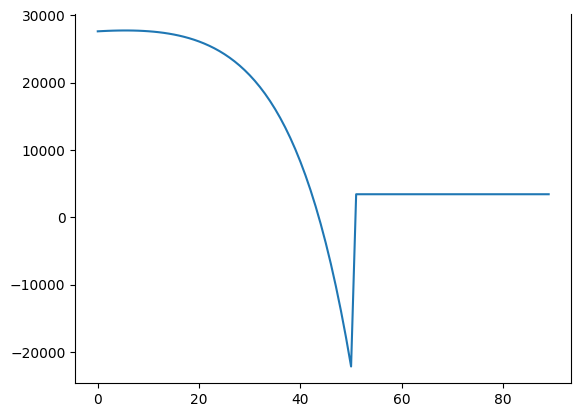

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000001F45FA25DC0>

In [14]:
plot(u_bangbang)

In [11]:
x_bangbang, _, Σ_bangbang = eye_saccade(u_bangbang, Ac, Bc, x0, xf, T, Tp, dt)

([0.0 0.0 … 9.999999375268988 9.999999375266032; 0.0 27.618622358926547 … -2.9563214098971002e-9 5.664439139962951e-9], [27618.622358926546, 27658.882855512762, 27692.358073446296, 27718.437100555315, 27736.45791141893, 27745.703106941168, 27745.39529922889, 27734.692111047967, 27712.680759720337, 27678.37218881739  …  3434.0657191896726, 3434.0657191413225, 3434.065719092315, 3434.0657190432103, 3434.0657189927165, 3434.0657189271847, 3434.0657191288883, 3434.0657171791013, 3434.0657279093384, 3434.06567372358], [0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 762.7883010049974;;; 0.0007627883010049974 0.7007069729355659; 0.7007069729355659 1408.6920812417081;;; … ;;; 2.5731948790164663 -8.722966506761809; -8.722966506761809 110.38774588357559;;; 2.5558593337488262 -8.792280253385638; -8.792280253385636 110.75032066968814;;; 2.5383855235627246 -8.849642727853917; -8.849642727853915 111.09796593208938])

In [12]:
error_bangbang = sqrt.(sum((x_bangbang .- xf) .^2, dims=1))[:]
#error = sqrt.(sum((x .- xf) .^2, dims=1))[:]
error_opt = sqrt.(sum((x_opt .- xf) .^2, dims=1))[:];

In [13]:
sum(error_opt[ntm+1:end])

32.304985762252294

In [14]:
sum(error_bangbang[ntm+1:end])

27.824840896174408

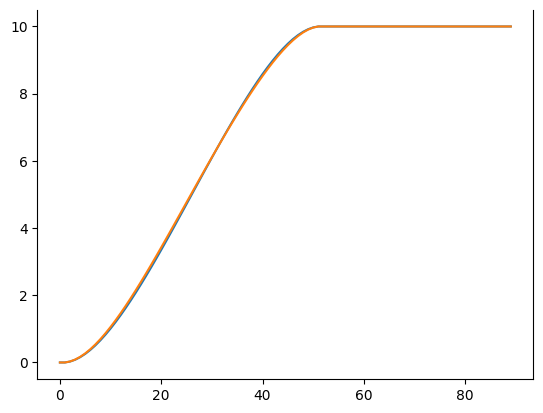

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000001CE2CDB1A00>

In [15]:
plot(x_bangbang[1, :])
plot(x_opt[1, :])

In [16]:
sum(Σ_bangbang[1,1,ntm+1:end])

109.57769361250438

In [17]:
#u = C \ d;
#x, _, Σ = eye_saccade(u, Ac, Bc, x0, xf, T, Tp, dt)

In [18]:
n = size(x0)[1]
ntm = round(Int, T/dt)
ntp = round(Int, Tp/dt)
nt = ntm + ntp # total time steps   

90

In [19]:
#sum(Σ[1,1,ntm+1:end])

In [20]:
sum(Σ_opt[1,1,ntm+1:end])

109.23170707291503

In [32]:
u_diff = u_bangbang - u_opt;

In [23]:
alphas = -30:0.1:30
n_alphas = length(alphas)

601

In [24]:
U = zeros(n_alphas, nt);
for (i, a) in enumerate(alphas)
    U[i, :] = u_opt + a * u_diff
end

In [25]:
X = zeros(n_alphas, nt);
Sigma = zeros(n_alphas)
Error = zeros(n_alphas)
for i in 1:n_alphas
    u = U[i, :]
    x, _, Σ = eye_saccade(u, Ac, Bc, x0, xf, T, Tp, dt)
    #error = sqrt.(sum((x .- xf) .^2, dims=1))[:]
    X[i, :] = x[1, :]
    Sigma[i] = sum(Σ[1,1,ntm+1:end]) / ntp
    #Error[i] = sum((x[2, ntm+1:end] .- xf[2]).^2)
    Error[i] = sum((x[1, ntm+1:end] .- xf[1]).^2) / ntp
    #Error[i] = sum(error[ntm+1:end])
end

In [26]:
"""
for i in 1:n_alphas
    plot(X[i, :])
end
"""

"for i in 1:n_alphas\n    plot(X[i, :])\nend\n"

In [27]:
alphas[argmin(Sigma)]

-0.1

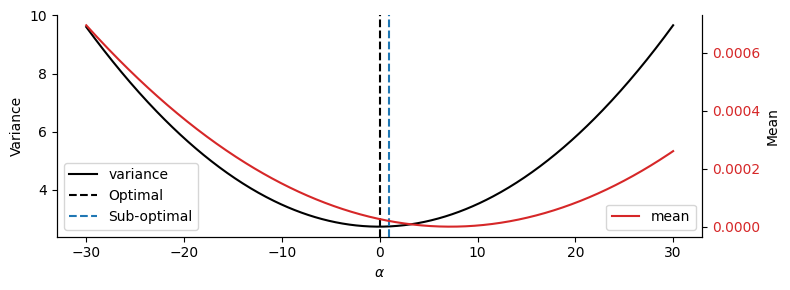

In [38]:
fig, ax1 = subplots(figsize=(8,3))

ax1.plot(alphas, Sigma, color="k", label="variance")
ax1.axvline(0, color="k", linestyle="--", label="Optimal")
#ax1.axvline(1, color="tab:blue", linestyle="--", label="Bang-Bang")
ax1.axvline(1, color="tab:blue", linestyle="--", label="Sub-optimal")
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax2.plot(alphas, Error, color="tab:red", label="mean")
ax1.set_ylabel("Variance")
ax2.set_ylabel("Mean")
ax1.set_xlabel(L"$\alpha$")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax1.legend(loc="lower left")
ax2.legend(loc="lower right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

bias と variance のtrade-offになっている？

In [29]:
argmin(Error)

373

In [30]:
cm = get_cmap(:viridis)

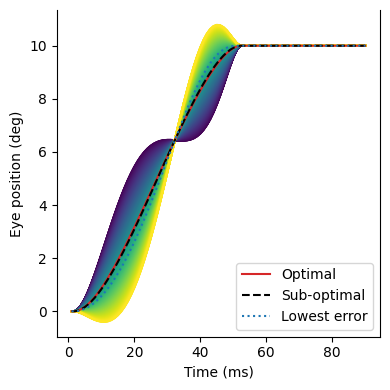

In [39]:
figure(figsize=(4,4))
for i in 1:n_alphas
    plot(trange, X[i, :], color=cm(i/n_alphas))
end
plot(trange, x_opt[1, :], color="tab:red", label="Optimal")
plot(trange, x_bangbang[1, :], color="k", linestyle="--", label="Sub-optimal")
#plot(trange, x_bangbang[1, :], color="k", linestyle="--", label="Bang-Bang")
plot(trange, X[argmin(Error), :], color="tab:blue", linestyle=":", label="Lowest error")
ylabel("Eye position (deg)")
xlabel("Time (ms)");
legend()
tight_layout()

In [35]:
size(U)

(601, 90)

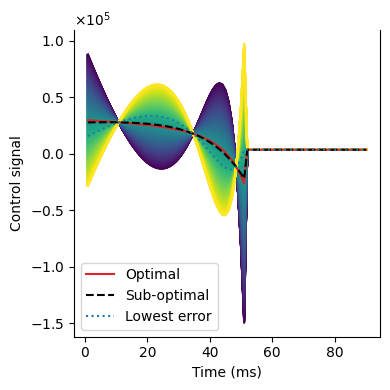

In [40]:
figure(figsize=(4,4))
for i in 1:n_alphas
    plot(trange, U[i, :], color=cm(i/n_alphas))
end
plot(trange, u_opt, color="tab:red", label="Optimal")
plot(trange, u_bangbang, color="k", linestyle="--", label="Sub-optimal")
#plot(trange, u_bangbang, color="k", linestyle="--", label="Bang-Bang")
plot(trange, U[argmin(Error), :], color="tab:blue", linestyle=":", label="Lowest error")
ylabel("Control signal")
xlabel("Time (ms)");
legend()
ax = gca()
ax[:ticklabel_format](style="sci",axis="y", useMathText=true, scilimits=(0,0))
tight_layout()